In [23]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

In [5]:
df["IsTrading"] = df.IsTrading.astype(int)
df.head()
df.IsTrading.value_counts()

1    1144
0     108
Name: IsTrading, dtype: int64

In [6]:
df.CoinName.value_counts()

RoyalCoin    2
AcesCoin     2
MedicCoin    2
PayCoin      2
DubaiCoin    2
            ..
ChessCoin    1
CometCoin    1
16BitCoin    1
Destiny      1
SteamPunk    1
Name: CoinName, Length: 1245, dtype: int64

In [7]:
df.Algorithm.value_counts()

Scrypt              424
X11                 197
SHA-256             131
X13                  57
PoS                  44
                   ... 
Stanford Folding      1
VBFT                  1
YescryptR16           1
IMesh                 1
TRC10                 1
Name: Algorithm, Length: 95, dtype: int64

In [8]:
df.ProofType.value_counts()

PoW                                      535
PoW/PoS                                  468
PoS                                      185
DPoS                                      21
PoS/PoW                                    5
PoA                                        3
PoC                                        3
LPoS                                       2
PoW/PoS                                    2
DPoW                                       1
DPOS                                       1
Limited Confidence Proof-of-Activity       1
HPoW                                       1
Zero-Knowledge Proof                       1
Pos                                        1
PoS/LPoS                                   1
PoW/DPoW                                   1
POS / MN                                   1
POBh                                       1
Proof of Trust                             1
DPoC                                       1
PoW + Hive                                 1
 PoW/PoS  

In [9]:
df.TotalCoinsMined.value_counts()

0.000000e+00    166
1.000000e+09      7
1.000000e+08      7
2.000000e+07      2
1.000000e+10      2
               ... 
5.954290e+05      1
7.822433e+06      1
4.316550e+07      1
1.556387e+07      1
2.149121e+07      1
Name: TotalCoinsMined, Length: 564, dtype: int64

In [10]:
df.TotalCoinSupply.value_counts()

0             92
21000000      64
100000000     62
1000000000    43
50000000      23
              ..
39200000       1
270875968      1
9736000        1
3652422000     1
233100000      1
Name: TotalCoinSupply, Length: 546, dtype: int64

In [11]:
df.dropna(inplace=True)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,1,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,1,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,1,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,1,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,1,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,1,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,1,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,1,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,1,PoS,1.283270e+05,1000000


In [12]:
df.drop(["Unnamed: 0"], axis=1)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,1,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,1,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,1,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,1,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,1,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,Gapcoin,Scrypt,1,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,1,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,1,PoW,7.296538e+06,21000000
1247,BitcoinPlus,Scrypt,1,PoS,1.283270e+05,1000000


In [13]:
df["TotalCoinSupply"] = df.TotalCoinSupply.astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       744 non-null    object 
 1   CoinName         744 non-null    object 
 2   Algorithm        744 non-null    object 
 3   IsTrading        744 non-null    int32  
 4   ProofType        744 non-null    object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  744 non-null    float64
dtypes: float64(2), int32(1), object(4)
memory usage: 43.6+ KB


In [15]:
num_df = ["TotalCoinsMined", "TotalCoinSupply"]
num_df2 = df.loc[:, num_df]

scaler = StandardScaler()
scaler.fit(num_df2)

num_df2 = pd.DataFrame(scaler.transform(num_df2), columns=num_df)
num_df2.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.100477,-0.036689
1,-0.073174,-0.036689
2,-0.100477,-0.036689
3,0.657142,-0.036596
4,-0.100013,-0.036689


In [16]:
dum_df = ['Algorithm', 'ProofType']
dum_df2 = df.loc[:, dum_df]

dum_df2 = pd.get_dummies(dum_df2)
dum_df2.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_df = pd.concat([num_df2, dum_df2], axis=1)
train_df.head()
train_df.dropna(inplace=True)
train_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.100477,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.100477,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.100013,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.097691,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.100243,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,-0.097890,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,-0.100237,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737,-0.074602,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,-0.100091,-0.036689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0.28, 0.183, 0.127, 0.096, 0.055, 0.048, 0.026, 0.016, 0.014, 0.011, 0.01, 0.009, 0.009, 0.008, 0.008, 0.006, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


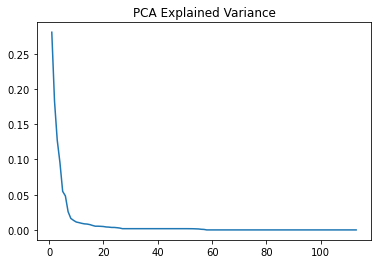

In [18]:
# PCA
pca = PCA(n_components=len(train_df.columns))
pca.fit(train_df)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(train_df.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


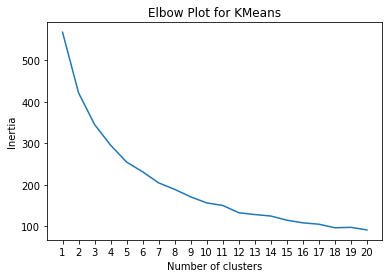

In [20]:
df_pca = pd.DataFrame(pca.transform(train_df))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

# K-means

inertia = []
# Same as k = list(range(1, 11))
k = list(range(1, 21))


# Optomizing k
for i in k:
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,21))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

In [25]:
# t-distributed stochastic neighbor embedding

t = TSNE(random_state=23)
t_features = t.fit_transform(df_pca)
print(t_features.shape)

t_df = pd.DataFrame(t_features, columns=["Feature1", "Feature2"])
t_df.head()

(375, 2)


,Feature1,Feature2
0,-11.752125,-1.935758
1,-11.380209,-1.308321
2,-14.861610,-11.867825
3,-17.541328,-6.561078
4,12.680847,3.944580


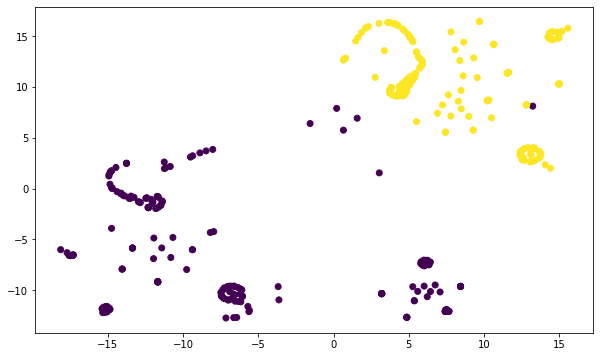

In [26]:
# Initializing model with K =2
k = 2
model = KMeans(n_clusters=k, random_state=23)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(t_df["Feature1"], t_df["Feature2"], c=k_labels)
plt.show()

# Recommendation

In [ ]:
# Crytocurrencies can be clustered into two general group based on PCA and TSNE machine learning models. 